# CS 1656 – Introduction to Data Science (Fall 2021) 

## Instructor: Alexandros Labrinidis
## Teaching Assistants: Evangelos Karageorgos, Xiaoting Li, Gordon Lu

## Term Project 

**Released: October 26, 2021**

**Due: November 30, 2021**

### Goal
The goal of this project is to expose you with a real data science problem, looking at the end-to-end pipeline. 

### What to do 
You are asked to write a Python Jupyter notebook, called `bikes_pgh_data.ipynb` that will:
* [Task 1] access historical bike rental data for 2021 from HealthyRidePGH and summarize the rental data  
* [Task 2] create graphs to show the popularity of the different rental stations, given filter conditions  
* [Task 3] create graphs to show the rebalancing issue  
* [Task 4] cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.  

**Your program should not take more than 15 minutes to run**

### Jupyter Notebook Rules
This skeleton is provided for you to complete the project. Please add your code in the code cells below each Task. Feel free to add cells as needed. Do not remove existing cells.

In [445]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import glob 
import math
import numpy as np
# Feel free to add here any other libraries as specified in the project description

For the sake of interactive display in Jupyter, we will enable matplotlib inline.

In [446]:
%matplotlib inline

### [Task 0] Warming Up
Task 0 is for testing. It is used to ensure that this Jupyter Notebook skeleton works on both your machines and our machine. Please run the following code to see if you can see a line plot. The line plot is the basic plot that we have seen in Recitation2. 

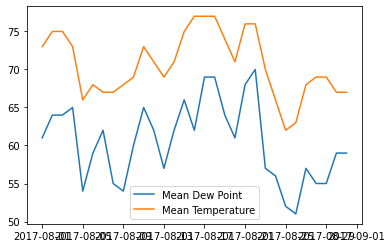

In [447]:
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df = pd.read_csv('KPIT_Aug17.csv', sep=',', engine='python', parse_dates=['EST'])
p1 = plt.plot(df['EST'],df['MeanDew PointF'])
p2 = plt.plot(df['EST'],df['Mean TemperatureF'])
plt.legend([p1[0],p2[0]], ['Mean Dew Point', 'Mean Temperature'])

plt.show()

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None) 

--- 
Add your code below this line

---
### Task 1

In this task you will need to access historical bike rental data for 2021 from HealthyRidePGH and summarize the rental data.

### Task 1.1 - must be run before task 1.2 because sharing variable names

In [448]:
def calcRebalance(curr):
    row = curr.name
    if row != 0: 
        prev = rebal.iloc[row-1]
        if curr['From station id'] != 0 and prev['To station id'] != 0 and curr['Bikeid'] == prev['Bikeid'] and curr['From station id'] != prev['To station id']:
            return 1

    return 0

In [449]:
%%time


'''
DAY | Station ID | fromCNT | toCNT | rebalCNT      
'''


# read 3 csvs
df = pd.concat([pd.read_csv(f) for f in glob.glob('HealthyRideRentals2021-*.csv')], ignore_index = True)

# prepare rebalCNT
rebal = df[['Trip id', 'Starttime', 'Bikeid', 'From station id', 'To station id']].copy()
# rebal = rebal.fillna(0)
rebal['Startdate'] = pd.to_datetime(rebal['Starttime']).dt.date
rebal = rebal.sort_values(by=['Bikeid', 'Startdate'])
rebal = rebal[rebal.groupby(['Bikeid'])['Bikeid'].transform('size') > 1]
rebal = rebal.reset_index(drop=True)
rebal['Rebal'] = rebal.apply(calcRebalance, axis=1)

# prepare fromCNT
froms = rebal[['Startdate', 'Bikeid', 'From station id']].copy()
#froms['Startdate'] = pd.to_datetime(froms['Starttime']).dt.date
froms = froms[froms.groupby(['Bikeid'])['Bikeid'].transform('size') > 1]
froms = froms.reset_index(drop=True)

# prepare toCNT
tos = rebal[['Startdate', 'Bikeid', 'To station id']].copy()
#tos['Startdate'] = pd.to_datetime(tos['Starttime']).dt.date
tos = tos[tos.groupby(['Bikeid'])['Bikeid'].transform('size') > 1]
tos = tos.reset_index(drop=True)


Wall time: 12 s


In [450]:
rebalCNT_pivot = pd.pivot_table(rebal,index=['Startdate', 'From station id'], values=['Rebal'], aggfunc='sum')
rebalCNT = rebalCNT_pivot.reset_index()
rebalCNT.columns = ['Day', 'StationID', 'rebalCNT']

fromCNT_pivot = pd.pivot_table(froms,index=['Startdate', 'From station id'], values=['From station id'],aggfunc=lambda x: len(x))
fromCNT = fromCNT_pivot.reset_index()
fromCNT.columns = ['Day', 'StationID', 'fromCNT']



toCNT_pivot = pd.pivot_table(tos,index=['Startdate', 'To station id'], values=['To station id'],aggfunc=lambda x: len(x))
toCNT = toCNT_pivot.reset_index()
toCNT.columns = ['Day', 'StationID', 'toCNT']

rebalCNT = rebalCNT.sort_values(by=['Day', 'StationID'])
fromCNT = fromCNT.sort_values(by=['Day', 'StationID'])
toCNT = toCNT.sort_values(by=['Day', 'StationID'])


fromAndTos = fromCNT.merge(toCNT, how='outer', on=['Day', 'StationID'])
fromAndTos = fromAndTos.fillna(0)
fromAndTos = fromAndTos.sort_values(by=['Day', 'StationID'])


df_final = pd.merge(fromAndTos, rebalCNT, how='outer', on=['Day', 'StationID'])
df_final = df_final.fillna(0)

df_final.head(20)


,Day,StationID,fromCNT,toCNT,rebalCNT
0,2021-01-01,1002.0,1.0,1.0,0.0
1,2021-01-01,1010.0,1.0,0.0,0.0
2,2021-01-01,1017.0,0.0,2.0,0.0
3,2021-01-01,1024.0,1.0,1.0,0.0
4,2021-01-01,1028.0,1.0,1.0,0.0
5,2021-01-01,1032.0,1.0,0.0,0.0
6,2021-01-01,1039.0,0.0,1.0,0.0
7,2021-01-01,1059.0,1.0,1.0,0.0
8,2021-01-01,1062.0,2.0,2.0,0.0
9,2021-01-01,1094.0,2.0,0.0,0.0


### Task 1.2

In [451]:
# prepare rebalCNT
rebal = df[['Trip id', 'Starttime', 'Bikeid', 'From station id', 'To station id']].copy()
rebal['Startdate'] = pd.to_datetime(rebal['Starttime']).dt.month
rebal = rebal.sort_values(by=['Bikeid', 'Startdate'])
rebal = rebal[rebal.groupby(['Bikeid'])['Bikeid'].transform('size') > 1]
rebal = rebal.reset_index(drop=True)
rebal['Rebal'] = rebal.apply(calcRebalance, axis=1)
rebalCNT_pivot = pd.pivot_table(rebal,index=['Startdate', 'From station id'], values=['Rebal'], aggfunc='sum')
rebalCNT = rebalCNT_pivot.reset_index()
rebalCNT.columns = ['Month', 'StationID', 'rebalCNT']

# prepare fromCNT
froms = rebal[['Startdate', 'Bikeid', 'From station id']].copy()
froms = froms[froms.groupby(['Bikeid'])['Bikeid'].transform('size') > 1]
froms = froms.reset_index(drop=True)
fromCNT_pivot = pd.pivot_table(froms,index=['Startdate', 'From station id'], values=['From station id'],aggfunc=lambda x: len(x))
fromCNT = fromCNT_pivot.reset_index()
fromCNT.columns = ['Month', 'StationID', 'fromCNT']
# prepare toCNT
tos = rebal[['Startdate', 'Bikeid', 'To station id']].copy()
tos = tos[tos.groupby(['Bikeid'])['Bikeid'].transform('size') > 1]
tos = tos.reset_index(drop=True)
toCNT_pivot = pd.pivot_table(tos,index=['Startdate', 'To station id'], values=['To station id'],aggfunc=lambda x: len(x))
toCNT = toCNT_pivot.reset_index()
toCNT.columns = ['Month', 'StationID', 'toCNT']

fromAndTos = pd.merge(fromCNT, toCNT, how='right', on=['Month', 'StationID'])
fromAndTos = fromAndTos.sort_values(by=['Month', 'StationID'])
df_final_month = pd.merge(fromAndTos, rebalCNT, how='outer', on=['Month', 'StationID'])
df_final_month = df_final_month.fillna(0)

df_final_month.head(20)

,Month,StationID,fromCNT,toCNT,rebalCNT
0,1,1000.0,23.0,29.0,2.0
1,1,1001.0,18.0,27.0,0.0
2,1,1002.0,27.0,27.0,3.0
3,1,1003.0,2.0,1.0,0.0
4,1,1004.0,20.0,16.0,3.0
5,1,1005.0,6.0,3.0,0.0
6,1,1006.0,8.0,8.0,1.0
7,1,1007.0,9.0,7.0,1.0
8,1,1009.0,8.0,3.0,0.0
9,1,1010.0,47.0,30.0,13.0


---
### Task 2

In this task you will need to create graphs to show the popularity of the different rental stations, given filter conditions.

In [452]:
# FILTER VARIABLES -- feel free to edit the values, but the names of the variables must remain 
#                     as they are and should be used by your code accordingly from this point on

filter_month = 4
filter_stationID = 1046


### Task 2.1
Show a bar chart for the 20 most popular bikestations when considering the number of fromCNT per station (for filter_month). Y axis should be the fromCNT per station, X axis should be the stationID. The first stationID corresponds to the most popular station.

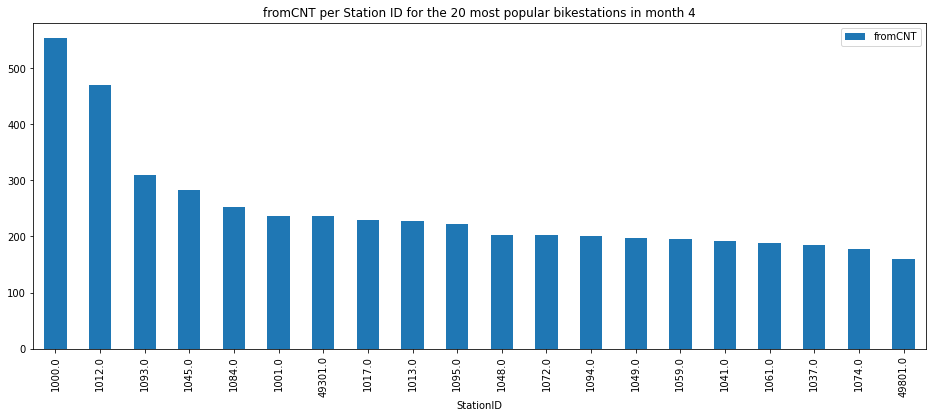

In [453]:
df_21 = df_final_month.loc[df_final_month['Month'] == filter_month]
df_21 = df_21[['Month', 'StationID', 'fromCNT']]
df_21 = df_21.sort_values(by=['fromCNT'], ascending=False)
df_21 = df_21.head(20)
df_21 = df_21.drop(['Month'], axis=1)
df_21["StationID"] = df_21["StationID"].astype(str)

title = 'fromCNT per Station ID for the 20 most popular bikestations in month ' + str(filter_month)
task21 = df_21.plot(x = 'StationID', y='fromCNT', kind='bar', rot=90, figsize=(16, 6), title=title)
plt.show()


### Task 2.2
For the filter_month and for the filter_stationID show a graph that shows the distribution of bike rentals throughout the month, for that station only. Y axis should be the fromCNT for that stationID for that day, X axis would be the different days in that month (i.e., 1 - 30 for April).

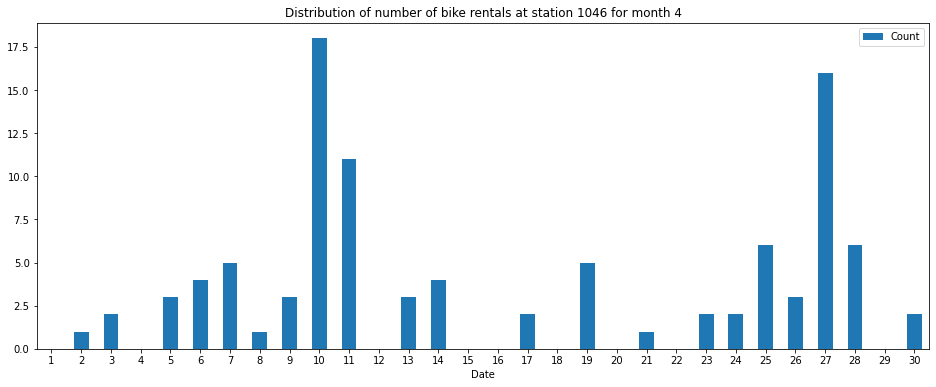

In [454]:
df22 = df[['Starttime','From station id']].copy()
df22 = df22.copy()
df22.columns = ['Date','Station ID']
df22['Month'] = pd.to_datetime(df22['Date']).dt.month
df22 = df22.loc[df22['Month'] == filter_month]
df22 = df22.drop(['Month'], axis=1)
df22['Date'] = pd.to_datetime(df22['Date']).dt.day
df22 = df22.sort_values('Date')
df22 = df22.loc[df22['Station ID'] == filter_stationID]
df22 = df22['Date'].groupby([df22['Date']]).count()

days_of_month = {1:31, 2:28, 3:31, 4:30, 5:31, 6:30, 7:31, 8:31, 9:30, 10:31, 11:30, 12:31}

keys = df22.keys()
counts = df22.tolist()

for i in range(1, days_of_month[filter_month] + 1):
    if i not in keys:
        keys = keys.insert(i - 1, i)
        counts.insert(i - 1, 0)

df22 = pd.DataFrame({'Date':keys, 'Count':counts})
ti = 'Distribution of number of bike rentals at station ' + str(filter_stationID) + ' for month ' + str(filter_month)
ax = df22.plot.bar(x='Date', y='Count', rot=0, title=ti, figsize=(16,6))


### Task 2.3
For the filter_month (e.g., April) show a graph that shows the distribution of bike rentals throughout the day, for all stations. Y axis should be the fromCNT for all stations in the filter_month, X axis would be the different hours in a day (i.e., 0 - 23).

In [455]:

rebal = df[['Trip id', 'Starttime', 'Bikeid', 'From station id', 'To station id']].copy()
froms = rebal[['Starttime', 'Bikeid', 'From station id']].copy()
#froms['Startdate'] = pd.to_datetime(froms['Starttime']).dt.date
froms = froms[froms.groupby(['Bikeid'])['Bikeid'].transform('size') > 1]
froms = froms.reset_index(drop=True)

fromCNT_pivot = pd.pivot_table(froms,index=['Starttime', 'From station id'], values=['From station id'],aggfunc=lambda x: len(x))
fromCNT = fromCNT_pivot.reset_index()
fromCNT.columns = ['Day', 'StationID', 'fromCNT']

fromCNT['Month'] = pd.to_datetime(fromCNT['Day']).dt.month
fromCNT = fromCNT.loc[fromCNT['Month'] == filter_month]
fromCNT = fromCNT.drop(['Month'], axis=1)
fromCNT = fromCNT.drop(['StationID'], axis=1)
fromCNT['Hour'] = pd.to_datetime(fromCNT['Day']).dt.hour
fromCNT = fromCNT.drop(['Day'], axis=1)

fromCNT = fromCNT.sort_values(by='Hour')



task23 = fromCNT.groupby("Hour").sum().reset_index()





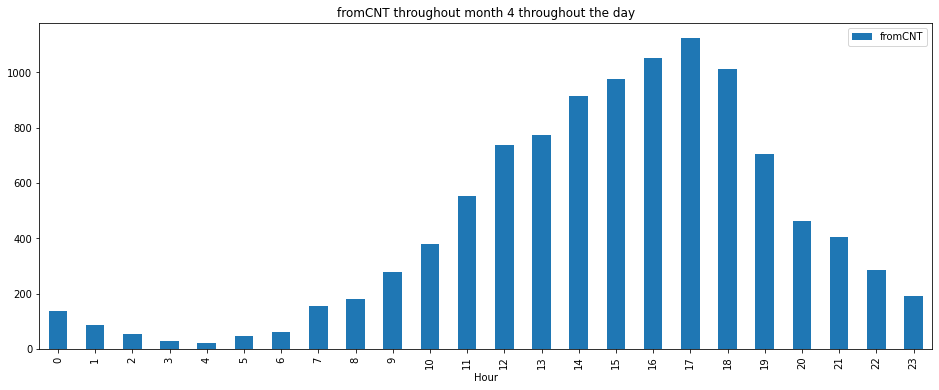

In [456]:
title = 'fromCNT throughout month ' + str(filter_month) + " throughout the day"
task23_output = task23.plot(x = 'Hour', y='fromCNT', kind='bar', rot=90, figsize=(16, 6), title=title)
plt.show()

### Task 2.4
Update your data structure to compute the total number of rentals each bike had for each day (regardless of station). In other words, figure out how many times a bike was listed in the input data, for each different date. For the filter_month, show a graph that shows the 20 most popular bikes. Y axis should be the number of times a bike was rented, X axis should be the bikeID. The first bikeID corresponds to the most popular station.

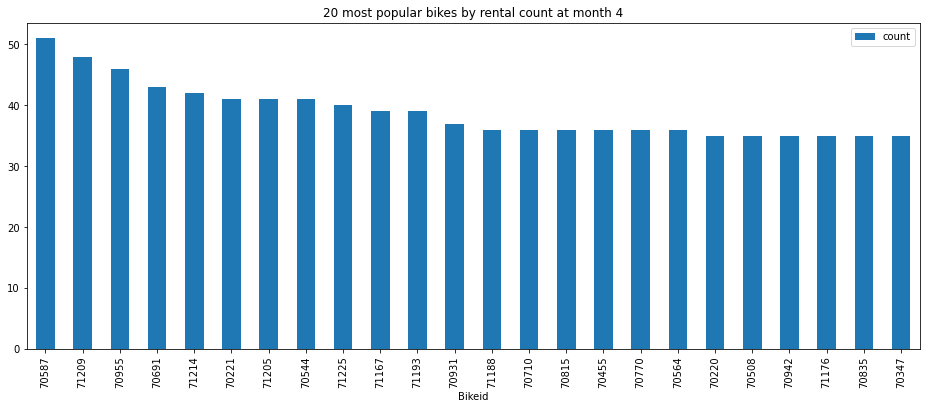

In [457]:
bike_count = df[['Starttime','Bikeid']].copy()
bike_count = bike_count.copy()

bike_count.columns = ['Date','Bikeid']
bike_count['Date'] = pd.to_datetime(bike_count['Date']).dt.month

bike_count = bike_count.loc[bike_count['Date'] == filter_month]
bike_count = bike_count.groupby(['Bikeid'])['Bikeid'].count()
bike_count = bike_count.sort_values(ascending=False)

keys = bike_count.keys()
counts = bike_count.tolist()

df23 = pd.DataFrame({'Bikeid':keys[0:24], 'count':counts[0:24]})
df23["Bikeid"] = df23["Bikeid"].astype(str)
title = '20 most popular bikes by rental count at month ' + str(filter_month)
ax = df23.plot.bar(x='Bikeid', y='count', title=title, figsize=(16,6))



---
### Task 3

In this task you will create graphs to show the rebalancing issue.

### Task 3.1
Task 3.1 Show a bar chart for the 20 most popular bikestations when considering the number of rebalCNT per station (for filter_month). Y axis should be the rebalCNT per station, X axis should be the stationID. The first stationID corresponds to the most demanding station in terms of rebalancing.

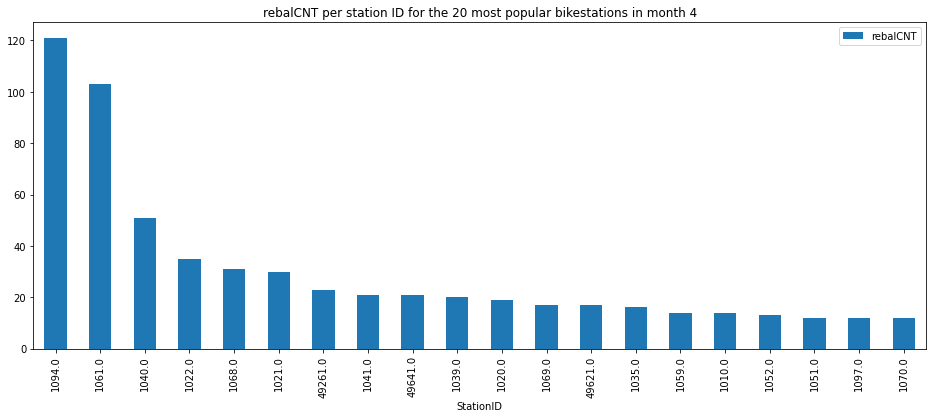

In [458]:
df_3 = df_final_month.loc[df_final_month['Month'] == filter_month]
df_3 = df_3[['Month', 'StationID', 'rebalCNT']]
df_3 = df_3.sort_values(by=['rebalCNT'], ascending=False)
df_3 = df_3.head(20)
df_3 = df_3.drop(['Month'], axis=1)
df_3["StationID"] = df_3["StationID"].astype(str)

title = 'rebalCNT per station ID for the 20 most popular bikestations in month ' + str(filter_month)
task21 = df_3.plot(x = 'StationID', y='rebalCNT', kind='bar', rot=90, figsize=(16, 6), title=title)
plt.show()


### Task 3.2
Task 3.2 For the filter_month and for the filter_stationID show a graph that shows the distribution of bike rebalancing throughout the month, for that station only. Y axis should be the rebalCNT for that stationID for that day, X axis would be the different days in that month (i.e., 1 - 30 for April).

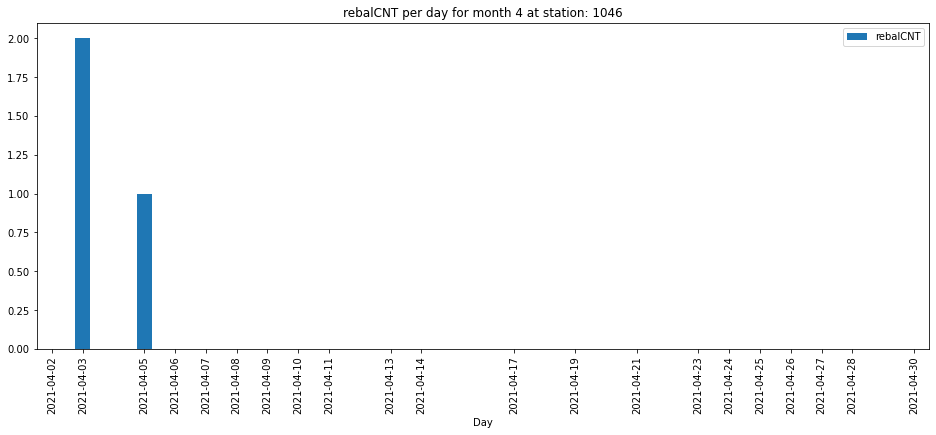

In [459]:
# prepare rebalCNT
rebal = df[['Trip id', 'Starttime', 'Bikeid', 'From station id', 'To station id']].copy()
# rebal = rebal.fillna(0)
rebal['Startdate'] = pd.to_datetime(rebal['Starttime']).dt.date
rebal = rebal.sort_values(by=['Bikeid', 'Startdate'])
rebal = rebal[rebal.groupby(['Bikeid'])['Bikeid'].transform('size') > 1]
rebal = rebal.reset_index(drop=True)
rebal['Rebal'] = rebal.apply(calcRebalance, axis=1)


rebalCNT_pivot = pd.pivot_table(rebal,index=['Startdate', 'From station id'], values=['Rebal'], aggfunc='sum')
rebalCNT = rebalCNT_pivot.reset_index()
rebalCNT.columns = ['Day', 'StationID', 'rebalCNT']

rebalCNT = rebalCNT.sort_values(by=['Day', 'StationID'])

rebalCNT['Month'] = pd.to_datetime(rebalCNT['Day']).dt.month
rebalCNT = rebalCNT.loc[rebalCNT['Month'] == filter_month]

rebalCNT.drop('Month', axis=1, inplace=True)

rebalCNT = rebalCNT.loc[rebalCNT['StationID'] == filter_stationID]
rebalCNT.head(20)

title = 'rebalCNT per day for month ' + str(filter_month) + ' ' + 'at station: ' + str(filter_stationID)
task32 = rebalCNT.plot(x = 'Day', y='rebalCNT', kind='bar', rot=90, figsize=(16, 6), title=title)
plt.show()

---
### Task 4

In this task you will cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.

3 variables for the total fromCNT for each station for each of the 3 months of the 2nd quarter (i.e., 4, 5, 6)
3 variables for the total rebalCNT for each station for each of the 3 months of the 2nd quarter (i.e., 4, 5, 6)

### Task 4.1

In [460]:
from sklearn.cluster import KMeans, DBSCAN

# read Q2 only
df = pd.read_csv('HealthyRideRentals2021-Q2.csv')

# prepare rebalCNT
rebal = df[['Trip id', 'Starttime', 'Bikeid', 'From station id', 'To station id']].copy()
# rebal = rebal.fillna(0)
rebal['Startdate'] = pd.to_datetime(rebal['Starttime']).dt.date
rebal = rebal.sort_values(by=['Bikeid', 'Startdate'])
rebal = rebal[rebal.groupby(['Bikeid'])['Bikeid'].transform('size') > 1]
rebal = rebal.reset_index(drop=True)
rebal['Rebal'] = rebal.apply(calcRebalance, axis=1)

# prepare fromCNT
froms = rebal[['Startdate', 'Bikeid', 'From station id']].copy()
#froms['Startdate'] = pd.to_datetime(froms['Starttime']).dt.date
froms = froms[froms.groupby(['Bikeid'])['Bikeid'].transform('size') > 1]
froms = froms.reset_index(drop=True)

# prepare toCNT
tos = rebal[['Startdate', 'Bikeid', 'To station id']].copy()
#tos['Startdate'] = pd.to_datetime(tos['Starttime']).dt.date
tos = tos[tos.groupby(['Bikeid'])['Bikeid'].transform('size') > 1]
tos = tos.reset_index(drop=True)


In [461]:
rebalCNT_pivot = pd.pivot_table(rebal,index=['Startdate', 'From station id'], values=['Rebal'], aggfunc='sum')
rebalCNT = rebalCNT_pivot.reset_index()
rebalCNT.columns = ['Day', 'StationID', 'rebalCNT']

fromCNT_pivot = pd.pivot_table(froms,index=['Startdate', 'From station id'], values=['From station id'],aggfunc=lambda x: len(x))
fromCNT = fromCNT_pivot.reset_index()
fromCNT.columns = ['Day', 'StationID', 'fromCNT']



toCNT_pivot = pd.pivot_table(tos,index=['Startdate', 'To station id'], values=['To station id'],aggfunc=lambda x: len(x))
toCNT = toCNT_pivot.reset_index()
toCNT.columns = ['Day', 'StationID', 'toCNT']

rebalCNT = rebalCNT.sort_values(by=['Day', 'StationID'])
fromCNT = fromCNT.sort_values(by=['Day', 'StationID'])
toCNT = toCNT.sort_values(by=['Day', 'StationID'])


fromAndTos = fromCNT.merge(toCNT, how='outer', on=['Day', 'StationID'])
fromAndTos = fromAndTos.fillna(0)
fromAndTos = fromAndTos.sort_values(by=['Day', 'StationID'])


df_final_4 = pd.merge(fromAndTos, rebalCNT, how='outer', on=['Day', 'StationID'])
df_final_4 = df_final_4.fillna(0)
df_final_4.drop('toCNT', axis=1, inplace=True)

df_final_4['Month'] = pd.to_datetime(df_final_4['Day']).dt.month
df_final_4.drop('Day', axis=1, inplace=True)

df_april = df_final_4.loc[df_final_4['Month'] == 4]
df_may = df_final_4.loc[df_final_4['Month'] == 5]
df_june = df_final_4.loc[df_final_4['Month'] == 6]


# df_final_4.groupby(["StationID", "Month"]).sum().reset_index()
#df_final_4.sort_values(by='Month')

df_april = df_april.groupby(["StationID", "Month"]).sum().reset_index()
df_april.columns = ['StationID', 'Month', 'fromCNT4', 'rebalCNT4']
df_april.drop('Month', axis=1, inplace=True)
df_may = df_may.groupby(["StationID", "Month"]).sum().reset_index()
df_may.columns = ['StationID', 'Month', 'fromCNT5', 'rebalCNT5']
df_may.drop('Month', axis=1, inplace=True)
df_june = df_june.groupby(["StationID", "Month"]).sum().reset_index()
df_june.columns = ['StationID', 'Month', 'fromCNT6', 'rebalCNT6']
df_june.drop('Month', axis=1, inplace=True)


df_aprilandmay = pd.merge(df_april, df_may, how='outer', on=['StationID'])
df_aprilandmay = df_aprilandmay.fillna(0)
df_aprilandmay = df_aprilandmay.sort_values(by=['StationID'])

dfz =  pd.merge(df_aprilandmay, df_june, how='outer', on=['StationID'])
dfz = dfz.fillna(0)


In [533]:
db_params = [(50,3),(30,3),(40,3)]
dbscan1 = DBSCAN(eps=db_params[0][0], min_samples = db_params[0][1]).fit_predict(dfz)
dbscan2 = DBSCAN(eps=db_params[1][0], min_samples = db_params[1][1]).fit_predict(dfz)
dbscan3 = DBSCAN(eps=db_params[2][0], min_samples = db_params[2][1]).fit_predict(dfz)

kmeans_params = [3, 4, 2]
kmeans1 = KMeans(n_clusters=kmeans_params[0]).fit_predict(dfz)
kmeans2 = KMeans(n_clusters=kmeans_params[1]).fit_predict(dfz)
kmeans3 = KMeans(n_clusters=kmeans_params[2]).fit_predict(dfz)


### Task 4.2

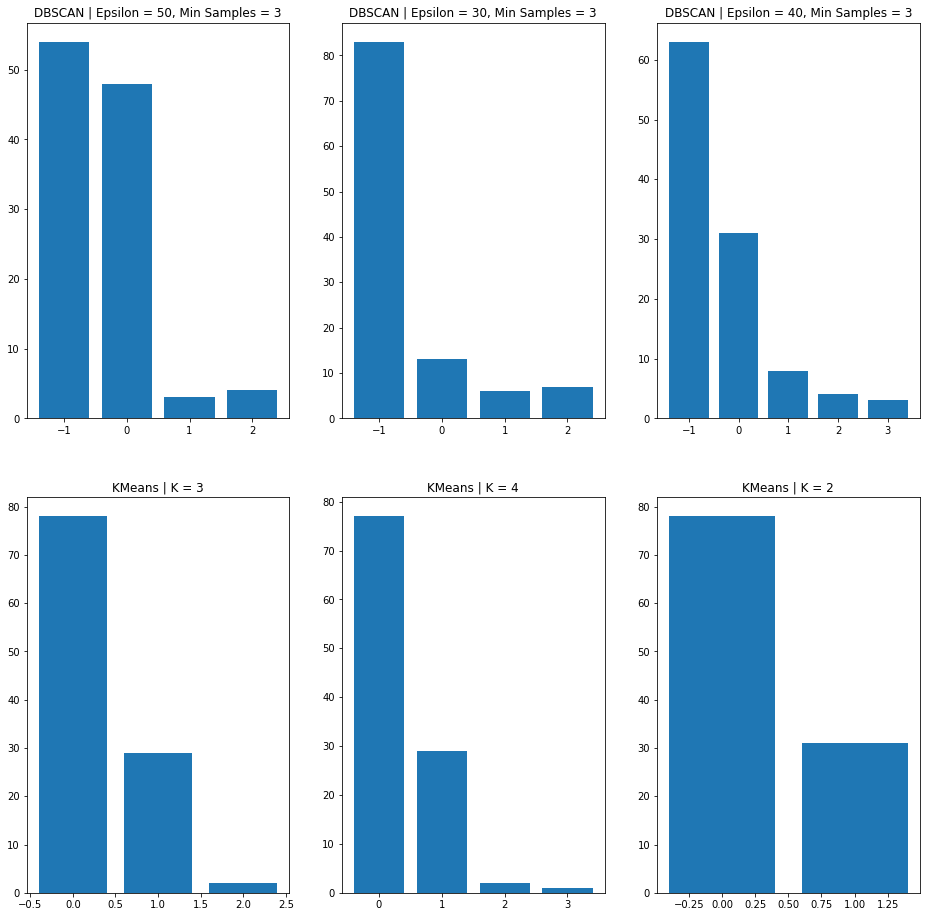

In [534]:
dbscan_results = [dbscan1, dbscan2, dbscan3]
kmeans_results = [kmeans1,kmeans2,kmeans3]
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (16,16))


for index, val in enumerate(dbscan_results):
    u, count = np.unique(val, return_counts=True)
    count_sort_ind = np.argsort(-count)
    xs = (u[count_sort_ind])
    ys = (count[count_sort_ind])
    axes[0,index].bar(xs,ys)
    axes[0,index].set_title(f'DBSCAN | Epsilon = {db_params[index][0]}, Min Samples = {db_params[index][1]}')


for index, val in enumerate(kmeans_results):
    u, count = np.unique(val, return_counts=True)
    count_sort_ind = np.argsort(-u)
    xs = (u[count_sort_ind])
    ys = (count[count_sort_ind])
    axes[1,index].bar(xs,ys)
    axes[1,index].set_title(f'KMeans | K = {kmeans_params[index]}')
    


plt.show()

### Task 4.3

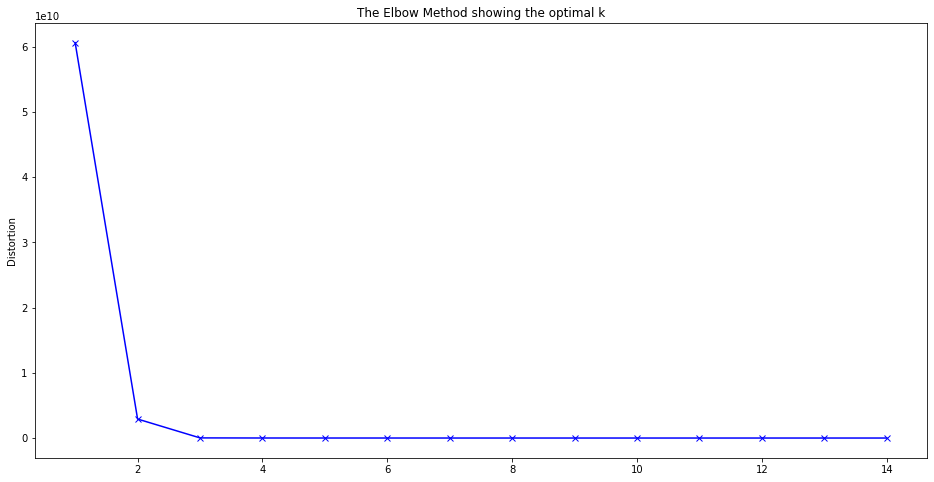

In [543]:
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dfz)
    distortions.append(kmeanModel.inertia_)


plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()



##### You should provide a brief explanation about your optimal choice of K. You should utilize the Elbow method on a reasonable range of K values. You should also mention (a) what is the best value of K that you found and (b) what is the best algorithm out of the two that you tried. For the second question, it is possible the results will be inconclusive.

Optimal K looks like 3 because that's the point where the distortion tapers off. Any higher K's have extremely diminishing returns. 

I prefer K-means because DBSCAN, while good because it will take less into account outliers, I think this scenario we would want to weigh outliers into our clustering. DBSCAN with the parameters I chose always had a large volume of noise, which would take away a lot of data. 

